In [60]:
#Домашнє завдання №3

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [62]:
#Напишіть функцію гіпотези лінійної регресії у векторному вигляді.

In [63]:
def hypothesis(X, w):
    return np.dot(X, w)

In [64]:
#Створіть функцію для обчислення функції втрат у векторному вигляді.

In [65]:
def compute_loss(X, y, w):
    m = len(y)
    predictions = hypothesis(X, w)
    loss = np.sum((predictions - y)**2) / (2 * m)
    return loss

In [66]:
#Реалізуйте один крок градієнтного спуску.

In [67]:
def gradient_descent_step(X, y, w, learning_rate):
    m = len(y)
    predictions = hypothesis(X, w)
    gradient = (1 / m) * np.dot(X.T, (predictions - y))
    w -= learning_rate * gradient
    return w

In [68]:
##Функція для багатокрокового градієнтного спуску в лінійній регресії.
def gradient_descent(X, y, w, learning_rate, num_iterations):
    for i in range(num_iterations):
        w = gradient_descent_step(X, y, w, learning_rate)
        if i % 100 == 0:
            print(f'Iteration {i}, Loss: {compute_loss(X, y, w)}')
    return w

In [69]:
#Знайдіть найкращі параметри w для датасету прогнозуючу ціну на будинок залежно 
#від площі, кількості ванних кімнат та кількості спалень.

In [70]:
df = pd.read_csv('Housing.csv')
df.replace('NaN', np.nan, inplace=True)
display(df.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [71]:
features = ['area', 'bedrooms', 'bathrooms']
X = df[features]
y = df['price']

# Масштабування даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Додавання стовпця з одиницями для вільного члена
X_ones = np.ones((X_scaled.shape[0], 1))
X_scaled = np.hstack((X_ones, X_scaled))

In [72]:
# Ініціалізація ваг
initial_w = np.zeros(X_scaled.shape[1])

In [73]:
# Гіперпараметри для градієнтного спуску
learning_rate = 0.01
num_iterations = 1000

In [75]:
# Знаходження найкращих параметрів за допомогою градієнтного спуску
best_w_gd = gradient_descent(X_scaled, y, initial_w, learning_rate, num_iterations)
print(f'Gradient Descent coefficients: {best_w_gd[1:]}')
print(f'Gradient Descent intercept: {best_w_gd[0]}')

Iteration 0, Loss: 12856932767146.533
Iteration 100, Loss: 2442130541843.6523
Iteration 200, Loss: 1100952381760.14
Iteration 300, Loss: 923228125432.7101
Iteration 400, Loss: 899349988814.1963
Iteration 500, Loss: 896106962232.1777
Iteration 600, Loss: 895659748870.8993
Iteration 700, Loss: 895596362224.3958
Iteration 800, Loss: 895586915096.5898
Iteration 900, Loss: 895585383053.9606
Gradient Descent coefficients: [821199.26709864 300296.28560637 695515.99623791]
Gradient Descent intercept: 4766523.46205873


In [76]:
# Знаходження найкращих параметрів за допомогою аналітичного рішення
w_analytic = np.dot(np.dot(np.linalg.inv(np.dot(X_scaled.T, X_scaled)), X_scaled.T), y)
print(f'Analytical coefficients: {w_analytic[1:]}')
print(f'Analytical intercept: {w_analytic[0]}')

Analytical coefficients: [821214.14349519 299983.57107963 695808.52272538]
Analytical intercept: 4766729.247706423


In [77]:
# Знаходження найкращих параметрів за допомогою Scikit-learn
model = LinearRegression().fit(X, y)
print(f'Scikit-learn coefficients: {model.coef_}')
print(f'Scikit-learn intercept: {model.intercept_}')

Scikit-learn coefficients: [3.78762754e+02 4.06820034e+05 1.38604950e+06]
Scikit-learn intercept: -173171.60763263796


In [78]:
X_original = df[features].values
gd_predictions = hypothesis(X_scaled, best_w_gd)
analytic_predictions = hypothesis(X_scaled, w_analytic)
scikit_predictions = model.predict(X_original)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


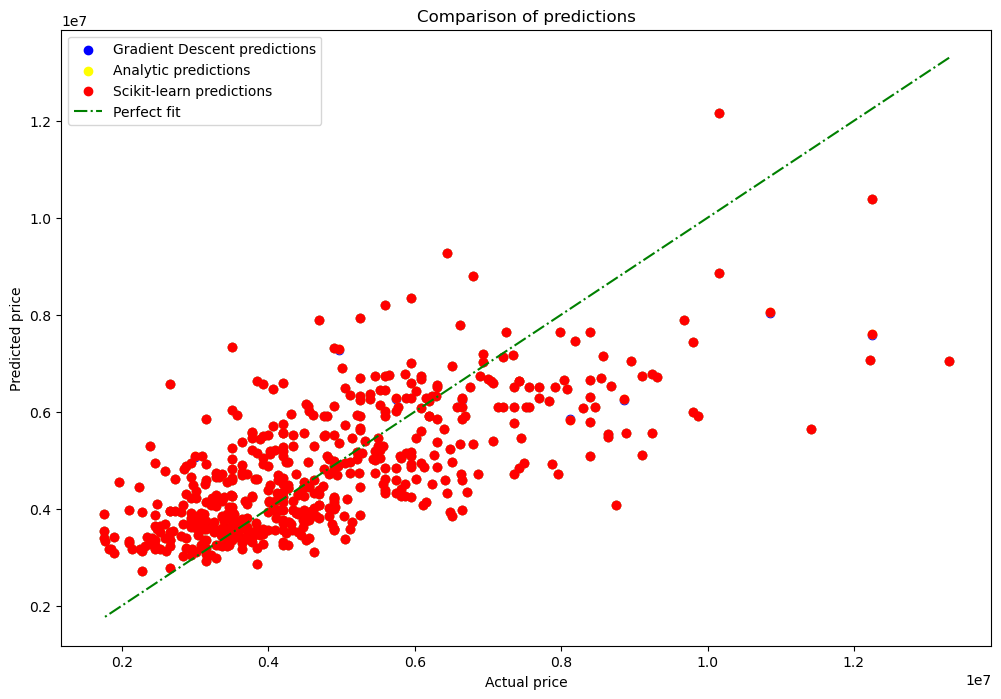

In [79]:
# Побудова графіків для порівняння
plt.figure(figsize=(12, 8))
plt.scatter(y, gd_predictions, color='blue', label='Gradient Descent predictions')
plt.scatter(y, analytic_predictions, color='yellow', label='Analytic predictions')
plt.scatter(y, scikit_predictions, color='red', label='Scikit-learn predictions')
plt.plot(y, y, color='green', linestyle='-.', label='Perfect fit')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Comparison of predictions')
plt.legend()
plt.show()

In [80]:
# Друк коефіцієнтів для порівняння
print(f'Gradient Descent coefficients: {best_w_gd[1:]}, intercept: {best_w_gd[0]}')
print(f'Analytical coefficients: {w_analytic[1:]}, intercept: {w_analytic[0]}')
print(f'Scikit-learn coefficients: {model.coef_}, intercept: {model.intercept_}')

Gradient Descent coefficients: [821199.26709864 300296.28560637 695515.99623791], intercept: 4766523.46205873
Analytical coefficients: [821214.14349519 299983.57107963 695808.52272538], intercept: 4766729.247706423
Scikit-learn coefficients: [3.78762754e+02 4.06820034e+05 1.38604950e+06], intercept: -173171.60763263796
